Kmeans
Hirarki
DBSCAN

# Preprocessing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('bitcoin.csv')
#  Tampilkan 5 data pertama
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-12,7203.507324,7503.872070,6815.770996,6972.371582,6972.371582,27773333679
1,2019-05-13,6971.178223,8047.413086,6898.282227,7814.915039,7814.915039,28677672181
2,2019-05-14,7807.884277,8268.712891,7696.391113,7994.416016,7994.416016,32031452226
3,2019-05-15,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,28344112919
4,2019-05-16,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,33167197581


In [2]:
# hapus atribut yang tidak digunakan
df.drop(['Date','Volume','Adj Close'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,Open,High,Low,Close
0,7203.507324,7503.872070,6815.770996,6972.371582
1,6971.178223,8047.413086,6898.282227,7814.915039
2,7807.884277,8268.712891,7696.391113,7994.416016
3,7989.374512,8216.423828,7899.106934,8205.167969
4,8194.500977,8320.824219,7729.608398,7884.909180


In [3]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['Open', 'High', 'Low', 'Close']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(367, 4)

In [4]:
df_scale[:5]

array([[-1.03960435, -0.95260247, -1.19309634, -1.19874871],
       [-1.19525367, -0.59706576, -1.13607948, -0.63384526],
       [-0.63470085, -0.4523109 , -0.58457076, -0.51349453],
       [-0.51311112, -0.4865138 , -0.4444902 , -0.37219083],
       [-0.37568625, -0.41822425, -0.56161698, -0.58691601]])

In [5]:
data = pd.DataFrame(df_scale)
data.columns = ['Open', 'High', 'Low', 'Close']

data_cluster = data.copy()
data.head()

,Open,High,Low,Close
0,-1.039604,-0.952602,-1.193096,-1.198749
1,-1.195254,-0.597066,-1.136079,-0.633845
2,-0.634701,-0.452311,-0.584571,-0.513495
3,-0.513111,-0.486514,-0.444490,-0.372191
4,-0.375686,-0.418224,-0.561617,-0.586916


In [6]:
data.describe()

,Open,High,Low,Close
count,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02
mean,-5.623718e-16,-4.147076e-16,-3.202857e-17,-2.076374e-16
std,1.001365e+00,1.001365e+00,1.001365e+00,1.001365e+00
min,-2.514121e+00,-2.373359e+00,-3.064923e+00,-2.540758e+00
25%,-8.030713e-01,-7.709874e-01,-7.496913e-01,-8.000742e-01
50%,-5.526082e-02,-8.716564e-02,-3.414514e-02,-5.837694e-02
75%,7.451626e-01,7.324974e-01,7.768498e-01,7.425013e-01
max,2.855240e+00,3.163474e+00,2.550495e+00,2.853502e+00


In [7]:
# data = df.copy()
# data_cluster = df.copy()

# K-means

Text(0, 0.5, 'Inertia')

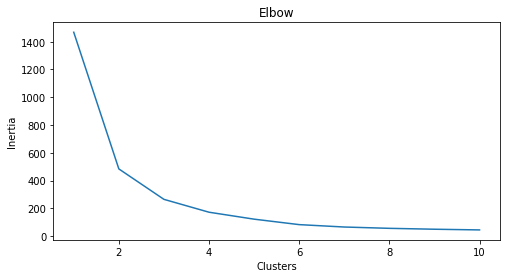

In [8]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [9]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4
0,-1.039604,-0.952602,-1.193096,-1.198749,0,0
1,-1.195254,-0.597066,-1.136079,-0.633845,0,0
2,-0.634701,-0.452311,-0.584571,-0.513495,2,2
3,-0.513111,-0.486514,-0.444490,-0.372191,2,2
4,-0.375686,-0.418224,-0.561617,-0.586916,2,2
...,...,...,...,...,...,...
362,0.791143,0.678014,0.846380,0.725709,1,1
363,0.727326,0.623802,0.717485,0.558915,1,1
364,0.560014,0.415610,-0.101744,-0.002584,2,2
365,0.000180,0.047926,-0.116107,-0.106262,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


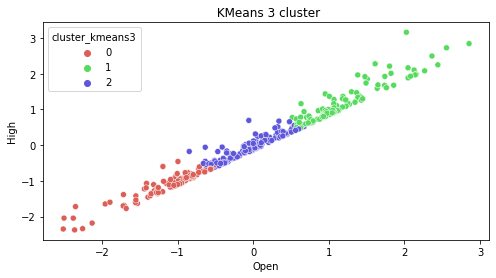

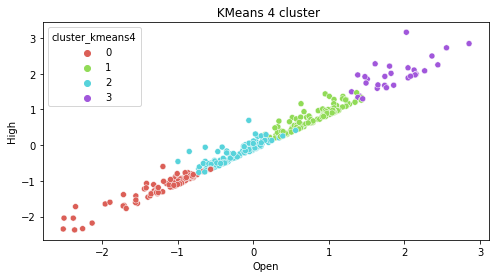

In [10]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Open'], data_cluster['High'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Open'], data_cluster['High'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

# Hierarchy

In [11]:
data

,Open,High,Low,Close
0,-1.039604,-0.952602,-1.193096,-1.198749
1,-1.195254,-0.597066,-1.136079,-0.633845
2,-0.634701,-0.452311,-0.584571,-0.513495
3,-0.513111,-0.486514,-0.444490,-0.372191
4,-0.375686,-0.418224,-0.561617,-0.586916
...,...,...,...,...
362,0.791143,0.678014,0.846380,0.725709
363,0.727326,0.623802,0.717485,0.558915
364,0.560014,0.415610,-0.101744,-0.002584
365,0.000180,0.047926,-0.116107,-0.106262


In [12]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [13]:
## Single Linkage

# In single linkage hierarchical clustering, 
# the distance between two clusters is defined as 
# the shortest distance between two points in each cluster. 
# For example, the distance between clusters “r” and “s” to
# the left is equal to the length of the arrow between their two closest points.

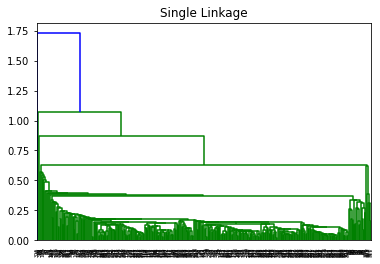

In [14]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

In [15]:
## Complete Linkage

# In complete linkage hierarchical clustering, 
# the distance between two clusters is defined as 
# the longest distance between two points in each cluster. 
# For example, the distance between clusters “r” and “s” to the 
# left is equal to the length of the arrow between their two furthest points. 

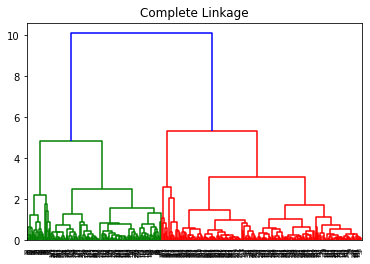

In [16]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [17]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [18]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,-1.039604,-0.952602,-1.193096,-1.198749,0,0,0
1,-1.195254,-0.597066,-1.136079,-0.633845,0,0,0
2,-0.634701,-0.452311,-0.584571,-0.513495,2,2,0
3,-0.513111,-0.486514,-0.444490,-0.372191,2,2,0
4,-0.375686,-0.418224,-0.561617,-0.586916,2,2,0
...,...,...,...,...,...,...,...
362,0.791143,0.678014,0.846380,0.725709,1,1,1
363,0.727326,0.623802,0.717485,0.558915,1,1,1
364,0.560014,0.415610,-0.101744,-0.002584,2,2,1
365,0.000180,0.047926,-0.116107,-0.106262,2,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Hierarchical Clustering')

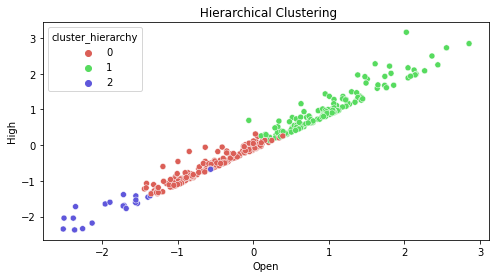

In [19]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Open'], data_cluster['High'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
data

,Open,High,Low,Close
0,-1.039604,-0.952602,-1.193096,-1.198749
1,-1.195254,-0.597066,-1.136079,-0.633845
2,-0.634701,-0.452311,-0.584571,-0.513495
3,-0.513111,-0.486514,-0.444490,-0.372191
4,-0.375686,-0.418224,-0.561617,-0.586916
...,...,...,...,...
362,0.791143,0.678014,0.846380,0.725709
363,0.727326,0.623802,0.717485,0.558915
364,0.560014,0.415610,-0.101744,-0.002584
365,0.000180,0.047926,-0.116107,-0.106262


In [22]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(eps=0.7)

In [23]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,-1.039604,-0.952602,-1.193096,-1.198749,0,0,0,0
1,-1.195254,-0.597066,-1.136079,-0.633845,0,0,0,0
2,-0.634701,-0.452311,-0.584571,-0.513495,2,2,0,0
3,-0.513111,-0.486514,-0.444490,-0.372191,2,2,0,0
4,-0.375686,-0.418224,-0.561617,-0.586916,2,2,0,0
...,...,...,...,...,...,...,...,...
362,0.791143,0.678014,0.846380,0.725709,1,1,1,0
363,0.727326,0.623802,0.717485,0.558915,1,1,1,0
364,0.560014,0.415610,-0.101744,-0.002584,2,2,1,0
365,0.000180,0.047926,-0.116107,-0.106262,2,2,0,0


In [24]:
data_cluster.describe()

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,367.000000,367.000000,367.000000,367.000000
mean,-5.623718e-16,-4.147076e-16,-3.202857e-17,-2.076374e-16,1.111717,1.253406,0.517711,0.008174
std,1.001365e+00,1.001365e+00,1.001365e+00,1.001365e+00,0.833748,0.942954,0.604254,0.156599
min,-2.514121e+00,-2.373359e+00,-3.064923e+00,-2.540758e+00,0.000000,0.000000,0.000000,-1.000000
25%,-8.030713e-01,-7.709874e-01,-7.496913e-01,-8.000742e-01,0.000000,0.000000,0.000000,0.000000
50%,-5.526082e-02,-8.716564e-02,-3.414514e-02,-5.837694e-02,1.000000,1.000000,0.000000,0.000000
75%,7.451626e-01,7.324974e-01,7.768498e-01,7.425013e-01,2.000000,2.000000,1.000000,0.000000
max,2.855240e+00,3.163474e+00,2.550495e+00,2.853502e+00,2.000000,3.000000,2.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' DBSCAN clustering')

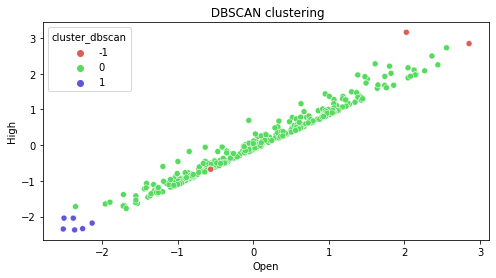

In [25]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Open'], data_cluster['High'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN clustering')

# K-MEDOIDS

In [26]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [27]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan,Cluster K-Medoids
0,-1.039604,-0.952602,-1.193096,-1.198749,0,0,0,0,2
1,-1.195254,-0.597066,-1.136079,-0.633845,0,0,0,0,2
2,-0.634701,-0.452311,-0.584571,-0.513495,2,2,0,0,1
3,-0.513111,-0.486514,-0.444490,-0.372191,2,2,0,0,1
4,-0.375686,-0.418224,-0.561617,-0.586916,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...
362,0.791143,0.678014,0.846380,0.725709,1,1,1,0,3
363,0.727326,0.623802,0.717485,0.558915,1,1,1,0,0
364,0.560014,0.415610,-0.101744,-0.002584,2,2,1,0,0
365,0.000180,0.047926,-0.116107,-0.106262,2,2,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


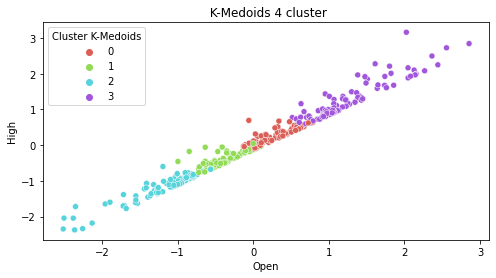

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Open'], data_cluster['High'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()